In [1]:
from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
x_train.shape

(60000, 28, 28)

In [23]:
single_img = x_train[0]

In [24]:
single_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
import matplotlib.pyplot as plt

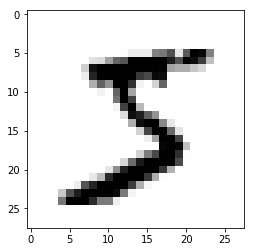

In [25]:
plt.imshow(single_img, cmap ='gray_r')

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
from keras.utils.np_utils import to_categorical

In [27]:
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train , 10)

In [29]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [30]:
single_img.max()

255

In [31]:
x_train = x_train / 255

In [32]:
x_test = x_test /(x_test.max())

In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [38]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [39]:
from keras.models import Sequential

In [40]:
from keras.layers import Dense, Conv2D,MaxPool2D, Flatten

In [41]:
model = Sequential()

In [42]:
model.add(Conv2D(filters= 32, kernel_size = (4,4), input_shape = (28,28,1), activation ='relu'))

In [43]:
model.add(MaxPool2D(pool_size = (2,2)))

In [44]:
model.add(Flatten())

In [45]:
model.add(Dense(128,activation = 'relu'))

In [46]:
model.add(Dense(10, activation = 'softmax'))

In [47]:
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(x_train, y_cat_train, epochs = 2)

Epoch 1/2
60000/60000 [==============================] - 23s 390us/step - loss: 0.0739 - acc: 0.9781
Epoch 2/2
60000/60000 [==============================] - 26s 425us/step - loss: 0.0407 - acc: 0.9870


In [51]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 1s 92us/step


[0.03818745249747298, 0.9879]